In [1]:
using DynamicalSystems, DifferentialEquations, OrdinaryDiffEq, StaticArrays

X = u = Y= 0..1
E = 0..20
box = E × X × u × Y

using CairoMakie

In [60]:
U(y) = U0 + ΔU0 / ( 1 + exp( -50 * ( y - ythr ) ) )
σ(x)= 1 / (1 + exp(-20 * (x - xthr)))

function model(u, p ,t)
    E, x, u_, y = u
    τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0 = p
    du1 = (-E + α * log( 1 + exp( ( J * u_ * x * E + I0 ) / α ) )) / τ
    du2 = ( 1 - x ) / τ_D - u_ * x * E
    du3 = (U(y) - u_) / τ_F + U(y) * ( 1 - u_ ) * E
    du4 = -y /  τ_y + β * σ(x)
    return SVector(du1, du2, du3, du4)
end

model (generic function with 1 method)

In [92]:
τ = 0.013; τ_D = 0.15; τ_F = 1; τ_y = 1.8
α = 1.5; J = 3.07; β = 0.4375
U0 = U0_start; ΔU0 = 0.305
xthr = 0.9; ythr = 0.5
I0 = I0_start;

In [97]:
println("U0: $U0");
println("I0: $I0");

U0: 0.3
I0: -1.6


In [93]:
p = SA[τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0]
u0 = SA[3.3403239669724387, 0.1, 0.1, 0.03677942307955071]
tspan = (0.0, 1000.0)
ds = ContinuousDynamicalSystem(model, u0, p)
println(ds.p)
tr = trajectory(ds, tspan[2], Ttr = tspan[2]/2; Δt = 0.001, diffeq = (alg = RK4(),  adaptive = false, dt = 0.001))

[0.013, 1.5, 0.15, 3.07, 0.3, 0.305, 1.8, 0.4375, 0.9, 0.5, -1.6]


4-dimensional Dataset{Float64} with 1000001 points
 2.12809  0.539623  0.796634  0.0149033
 2.10032  0.541774  0.796267  0.0148954
 2.07327  0.54392   0.795898  0.0148875
 2.0469   0.54606   0.795529  0.0148795
 2.02121  0.548194  0.795158  0.0148717
 1.99619  0.550322  0.794787  0.0148638
 1.97182  0.552444  0.794415  0.0148559
 1.9481   0.554559  0.794041  0.0148481
 1.925    0.556667  0.793667  0.0148403
 1.90253  0.558769  0.793292  0.0148325
 1.88066  0.560863  0.792917  0.0148248
 1.85938  0.562951  0.79254   0.0148171
 1.83869  0.565032  0.792163  0.0148094
 ⋮                            
 6.49596  0.747681  0.726582  0.0164644
 6.71128  0.745786  0.726697  0.0164748
 6.93568  0.743795  0.72683   0.0164844
 7.16941  0.741702  0.726981  0.0164933
 7.41269  0.739506  0.72715   0.0165015
 7.66574  0.737202  0.72734   0.0165089
 7.92875  0.734788  0.72755   0.0165156
 8.2019   0.73226   0.727781  0.0165216
 8.48536  0.729615  0.728034  0.0165268
 8.77925  0.72685   0.72831   0.016531

In [94]:
cord1 = 2
cord2 = 3
cord3 = 1

ts, tf = 1, 10000

(1, 10000)

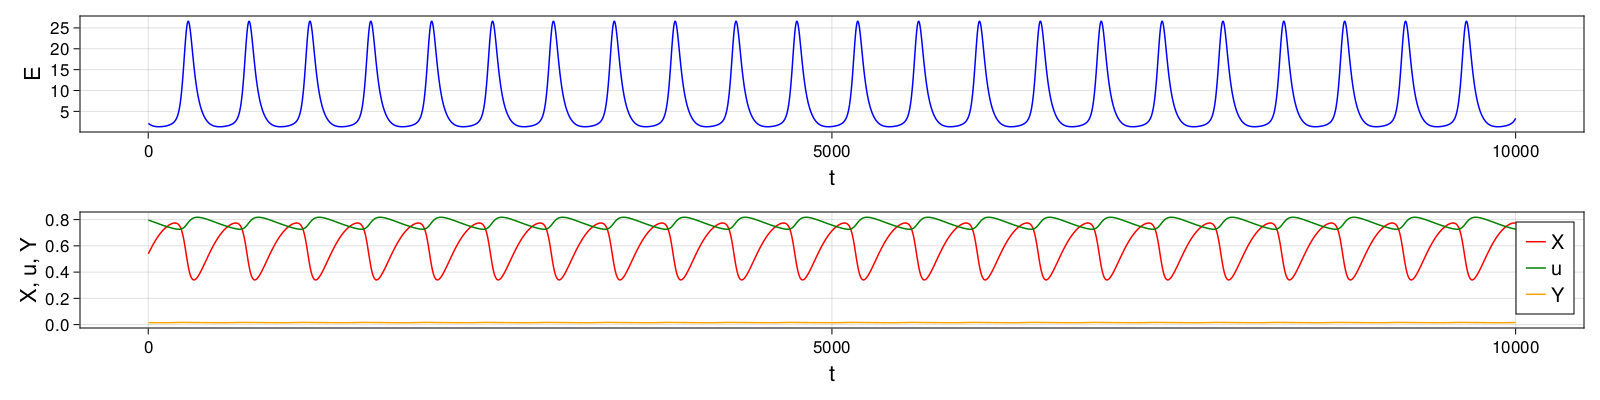

In [95]:
f = Figure(resolution = (1600, 400))

ax1 = Axis(f[1, 1], xlabel = "t", ylabel = "E", xlabelsize = 22, ylabelsize = 22,xticklabelsize = 17, yticklabelsize = 17)
ax2 = Axis(f[2, 1], xlabel = "t", ylabel = "X, u, Y", xlabelsize = 22, ylabelsize = 22,xticklabelsize = 17, yticklabelsize = 17)

lines!(ax1, tr[ts:tf, 1], color = "blue", label = "E")

lines!(ax2, tr[ts:tf, 2], color = "red", label = "X")
lines!(ax2, tr[ts:tf, 3], color = "green", label = "u")
lines!(ax2, tr[ts:tf, 4], color = "orange", label = "Y")

axislegend(ax2, labelsize=20)
f

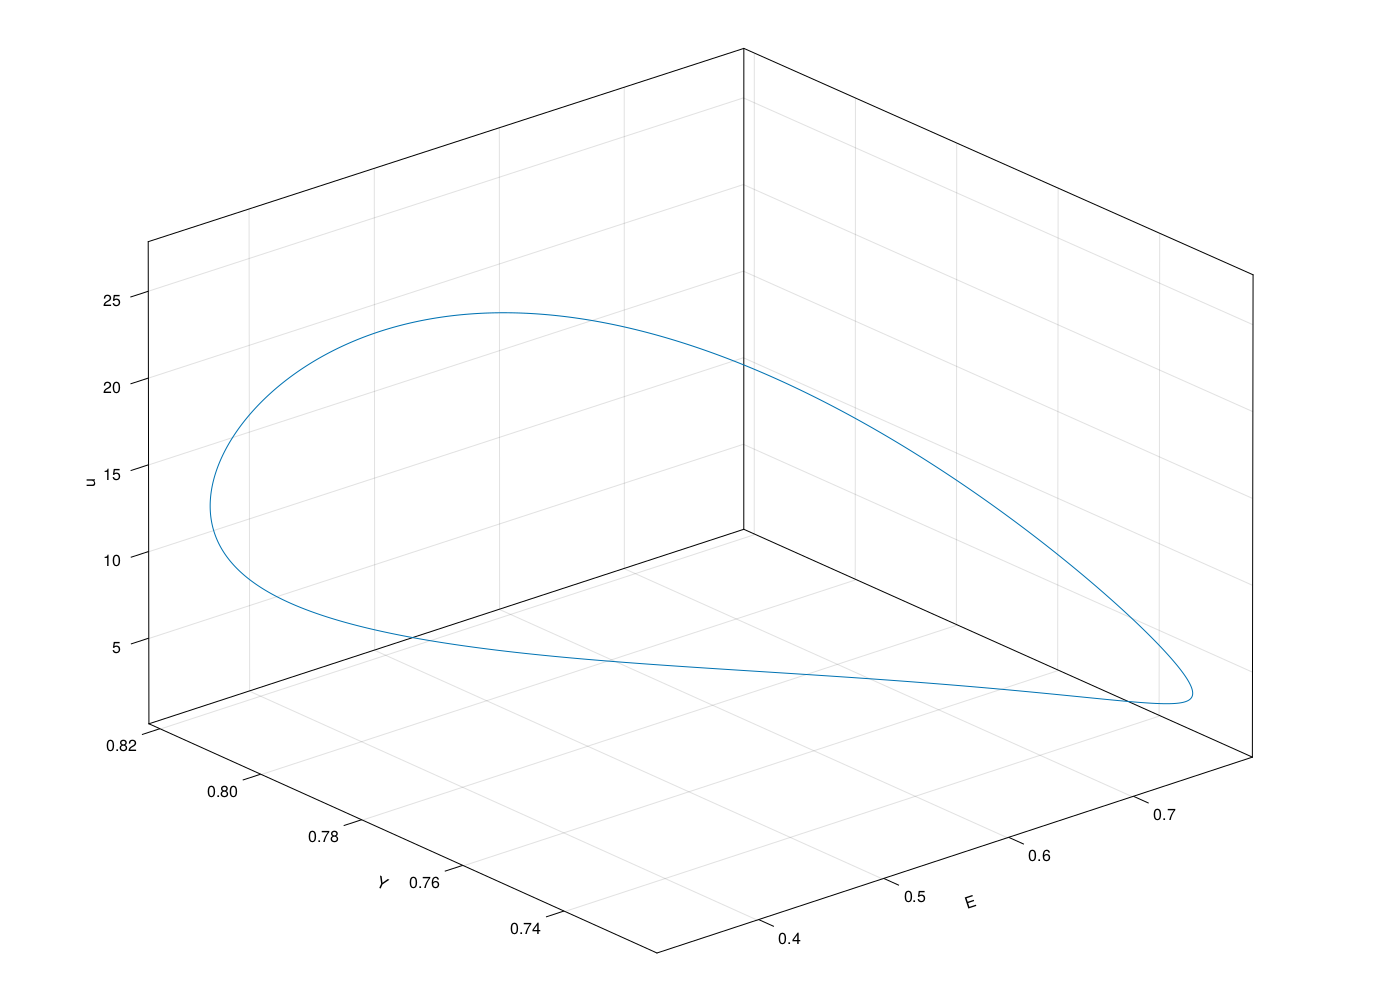

In [96]:
f = Figure(resolution = (1400, 1000))
ts, tf = 1, 10000
ax = Axis3(f[1, 1], xlabel = "E", ylabel = "Y", zlabel = "u")
lines!(tr[ts:tf, cord1], tr[ts:tf, cord2], tr[ts:tf, cord3], linewidth = 1)
f

In [63]:
λλ = lyapunovspectrum(ds, tspan[2], Δt = 1, Ttr = tspan[2]/2; diffeq = (alg = RK4(),  adaptive = false, dt = 0.01) )

4-element Vector{Float64}:
  0.0022604458973302425
 -0.5555555555605617
 -2.2775728825761155
 -8.778806136201686

In [9]:
function diff_fp(fp, point)
    
    len = length(fp)
    ϵ = [0.001, 0.001, 0.001, 0.001]
    res = zeros(len)
    for index in range(1, len, step = 1)
        
        if ( abs.(fp[index] - abs.(point)) ) < ϵ
            res[index] = index
        else
            res[index] = -1
            
        end
    end
    return convert(Int64, maximum(res))
    
end

function diff_eigs(λλ, eigs)
    ϵ = [0.01, 0.01, 0.01, 0.01]
    dif = abs.( sort( real(eigs) ) + (-1) * sort( λλ ) )
    if dif < ϵ
        return true # bad
    else
        return false # good
    end
end

diff_eigs (generic function with 1 method)

In [102]:
U0_start =  0.3
U0_finish = 0.24

I0_start =  -1.6
I0_finish = -1.5

len = 200
range_U0 = range(U0_start, U0_finish, length = len )
range_I0 = range(I0_start, I0_finish, length = len )

u0_for_map = SA[3.3403239669724387, 0.1, 0.1, 0.03677942307955071]

4-element SVector{4, Float64} with indices SOneTo(4):
 3.3403239669724387
 0.1
 0.1
 0.03677942307955071

In [99]:
length(range_I0), length(range_U0)

(200, 200)

In [100]:
length(range_I0) *  length(range_U0)

40000

In [101]:
array_initial_condition = zeros(length(range_U0), length(range_I0), 4 )
array_SLE = zeros(length(range_U0), length(range_I0), 4 )

200×200×4 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.

In [117]:
function output_idx_params(index_i, index_j, namep1, namep2, p1, p2)
        println("index i: $index_i;");flush(stdout)
        println("index i: $index_j;");flush(stdout)
        println(namep1, ": $p1;");flush(stdout)
        println(namep2, ": $p2;");flush(stdout)
        println("______________________________");flush(stdout)
        println("");flush(stdout)
end

output_idx_params (generic function with 2 methods)

In [119]:
for (index_i, I0_lc) in enumerate(range_I0)
    for (index_j, U0_lc) in enumerate(range_U0)
        if index_i == index_j
            u0_local = u0_for_map
        end
            output_idx_params(index_i, index_j, "U0", "U0", I0_lc, U0_lc  )
    end
end

index i: 1;
index i: 1;
U0: -1.6;
U0: 0.3;
______________________________

index i: 1;
index i: 2;
U0: -1.6;
U0: 0.29969849246231156;
______________________________

index i: 1;
index i: 3;
U0: -1.6;
U0: 0.29939698492462313;
______________________________

index i: 1;
index i: 4;
U0: -1.6;
U0: 0.29909547738693465;
______________________________

index i: 1;
index i: 5;
U0: -1.6;
U0: 0.2987939698492462;
______________________________

index i: 1;
index i: 6;
U0: -1.6;
U0: 0.2984924623115578;
______________________________

index i: 1;
index i: 7;
U0: -1.6;
U0: 0.29819095477386937;
______________________________

index i: 1;
index i: 8;
U0: -1.6;
U0: 0.2978894472361809;
______________________________

index i: 1;
index i: 9;
U0: -1.6;
U0: 0.29758793969849245;
______________________________

index i: 1;
index i: 10;
U0: -1.6;
U0: 0.297286432160804;
______________________________

index i: 1;
index i: 11;
U0: -1.6;
U0: 0.2969849246231156;
______________________________

index i: 1;
index i


index i: 1;
index i: 91;
U0: -1.6;
U0: 0.2728643216080402;
______________________________

index i: 1;
index i: 92;
U0: -1.6;
U0: 0.27256281407035177;
______________________________

index i: 1;
index i: 93;
U0: -1.6;
U0: 0.27226130653266334;
______________________________

index i: 1;
index i: 94;
U0: -1.6;
U0: 0.27195979899497486;
______________________________

index i: 1;
index i: 95;
U0: -1.6;
U0: 0.2716582914572864;
______________________________

index i: 1;
index i: 96;
U0: -1.6;
U0: 0.271356783919598;
______________________________

index i: 1;
index i: 97;
U0: -1.6;
U0: 0.27105527638190957;
______________________________

index i: 1;
index i: 98;
U0: -1.6;
U0: 0.2707537688442211;
______________________________

index i: 1;
index i: 99;
U0: -1.6;
U0: 0.27045226130653266;
______________________________

index i: 1;
index i: 100;
U0: -1.6;
U0: 0.27015075376884423;
______________________________

index i: 1;
index i: 101;
U0: -1.6;
U0: 0.2698492462311558;
_______________________


index i: 1;
index i: 180;
U0: -1.6;
U0: 0.24603015075376886;
______________________________

index i: 1;
index i: 181;
U0: -1.6;
U0: 0.2457286432160804;
______________________________

index i: 1;
index i: 182;
U0: -1.6;
U0: 0.24542713567839197;
______________________________

index i: 1;
index i: 183;
U0: -1.6;
U0: 0.24512562814070352;
______________________________

index i: 1;
index i: 184;
U0: -1.6;
U0: 0.2448241206030151;
______________________________

index i: 1;
index i: 185;
U0: -1.6;
U0: 0.24452261306532663;
______________________________

index i: 1;
index i: 186;
U0: -1.6;
U0: 0.2442211055276382;
______________________________

index i: 1;
index i: 187;
U0: -1.6;
U0: 0.24391959798994975;
______________________________

index i: 1;
index i: 188;
U0: -1.6;
U0: 0.2436180904522613;
______________________________

index i: 1;
index i: 189;
U0: -1.6;
U0: 0.24331658291457287;
______________________________

index i: 1;
index i: 190;
U0: -1.6;
U0: 0.2430150753768844;
_____________

______________________________

index i: 2;
index i: 61;
U0: -1.599497487437186;
U0: 0.2819095477386935;
______________________________

index i: 2;
index i: 62;
U0: -1.599497487437186;
U0: 0.28160804020100505;
______________________________

index i: 2;
index i: 63;
U0: -1.599497487437186;
U0: 0.28130653266331657;
______________________________

index i: 2;
index i: 64;
U0: -1.599497487437186;
U0: 0.28100502512562814;
______________________________

index i: 2;
index i: 65;
U0: -1.599497487437186;
U0: 0.2807035175879397;
______________________________

index i: 2;
index i: 66;
U0: -1.599497487437186;
U0: 0.2804020100502513;
______________________________

index i: 2;
index i: 67;
U0: -1.599497487437186;
U0: 0.2801005025125628;
______________________________

index i: 2;
index i: 68;
U0: -1.599497487437186;
U0: 0.27979899497487437;
______________________________

index i: 2;
index i: 69;
U0: -1.599497487437186;
U0: 0.27949748743718594;
______________________________

index i: 2;
index 

LoadError: InterruptException: